# Cepheid Variable Anaysis of Star CY Aqr 

This lab centers on the photometric analysis of a short-period Cepheid variable star using a sequence of exposures in different filters, photometric analysis, as well as associated calibration data.



In [1]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import pylab
#import sys; sys.path.append('/home/a180i/lib/python/')
#import a180

## Photometric Analysis of a Cepheid Variable Star

In this section we want to focus on calibration and photometric analysis of our raw data. The images taken in both filters (Green (V) and Red (R)) are accompaniedby dark, twilight flats, and  sky images so that the data can be isolated and studied. The elimination of any background calibration in an essential part of this process and is necessary to get qualtiy data. In  this section below the raw data is loaded in from the main server and stored in two seperate directories. Each file is grouped based on what type of exposure, the filter used, and the exposure time. A photometric standard star of known magnitude is also observed so that flux measurements can be attained and distacne could me calcualted. 

In [70]:
raw_data_dir = '/data/2024-Fall/20241023' # directory where raw data is stored from the UCLA 24 inch telescope. 
proc_data_dir = '/data/home/a180m/Proc_Data_Lab2/' #Create a directory for all the processed data 

# dark frames corresponding to the flats
raw_dark_files = ['/vdark_60s_001.FIT',
                  '/vdark_60s_002.FIT',
                  '/vdark_60s_003.FIT',
                  '/rdark_60s_001.FIT',
                  '/rdark_60s_002.FIT',
                  '/rdark_60s_003.FIT'
                 ]

# flat fields in V and R band
raw_flatV_files = ['/vflat_001.FIT',
                   '/vflat_002.FIT',
                   '/vflat_003.FIT',
                  ]

raw_flatR_files = ['/rflat_001.FIT',
                   '/rflat_002.FIT',
                   '/rflat_003.FIT',
                  ]

# sky images in V and R band
raw_skyV_files = ['/vskyafO_60s_001.FIT',
                  '/vskyafO_60s_002.FIT',
                  '/vskyafO_60s_003.FIT',
                  '/vskyb4O_60s_001.FIT',
                  '/vskyb4O_60s_002.FIT',
                  '/vskyb4O_60s_003.FIT'
                 ]
raw_skyR_files = ['/rskyafO_60s_001.FIT',
                  '/rskyafO_60s_002.FIT',
                  '/rskyafO_60s_003.FIT',
                  '/rskyb4O_60s_001.FIT',
                  '/rskyb4O_60s_002.FIT',
                  '/rskyb4O_60s_003.FIT'
                 ]

# science target observations in V and R band
raw_targV_files = ['v_001.FIT',
                   'v_002.FIT',
                   'v_003.FIT',
                   'v_004.FIT',
                   'v_005.FIT',
                   'v_006.FIT',
                   'v_007.FIT',
                   'v_008.FIT',
                   'v_009.FIT',
                   'v_010.FIT',
                   'v_011.FIT',
                   'v_012.FIT',
                   'v_013.FIT',
                   'v_014.FIT',
                   'v_015.FIT',
                   'v_016.FIT',
                   'v_017.FIT',
                   'v_018.FIT',
                   'v_019.FIT',
                   'v_020.FIT',
                   'v_021.FIT',
                   'v_022.FIT',
                   'v_023.FIT',
                   'v_024.FIT',
                   'v_025.FIT',
                   'v_026.FIT',
                  ]
raw_targR_files = ['r_001.FIT',
                   'r_002.FIT',
                   'r_003.FIT',
                   'r_004.FIT',
                   'r_005.FIT',
                   'r_006.FIT',
                   'r_007.FIT',
                   'r_008.FIT',
                   'r_009.FIT',
                   'r_010.FIT',
                   'r_011.FIT',
                   'r_012.FIT',
                   'r_013.FIT',
                   'r_014.FIT',
                   'r_015.FIT',
                   'r_016.FIT',
                   'r_017.FIT',
                   'r_018.FIT',
                   'r_019.FIT',
                   'r_020.FIT',
                   'r_021.FIT',
                   'r_022.FIT',
                   'r_023.FIT',
                   'r_024.FIT',
                   'r_025.FIT',
                   'r_026.FIT',
                     ]

# skies for the photometric standard stars 
raw_photskyV_files = ['/vskyafS_60s_001.FIT',
                  '/vskyafS_60s_002.FIT',
                  '/vskyafS_60s_003.FIT',
                  '/vskyafS_60s_004.FIT',
                  '/vskyafS_60s_005.FIT',
                  '/vskyb4S_60s_001.FIT',
                  '/vskyb4S_60s_002.FIT',
                  '/vskyb4S_60s_003.FIT',
                     ]
raw_photskyR_files = ['/rskyafS_60s_001.FIT',
                  '/rskyafS_60s_002.FIT',
                  '/rskyafS_60s_003.FIT',
                  '/rskyafS_60s_004.FIT',
                  '/rskyafS_60s_005.FIT',
                  '/rskyb4S_60s_001.FIT',
                  '/rskyb4S_60s_002.FIT',
                  '/rskyb4S_60s_003.FIT',
                      
                     ]

# observations of the photometric standard star (Landolt Photometric Standard Star)
raw_photV_files = ['vS_60s_001.FIT',
                   'vS_60s_002.FIT',
                   'vS_60s_003.FIT',
                   'vS_60s_004.FIT',
                   'vS_60s_005.FIT',
                  ]
raw_photR_files = ['rS_60s_001.FIT',
                   'rS_60s_002.FIT',
                   'rS_60s_003.FIT',
                   'rS_60s_004.FIT',
                   'rS_60s_005.FIT',
                     ]


### Calibrating the data

We'll need to calibrate our data. For our target star images, we'll need to subtract out the background light using our sky exposures, as well as divide by the response function (the "flat field").

#### Creating the flat fields in each band

For each band ($V$ and $R$), we must first construct the flat field; this is done by removing the expected bias and dark current levels.

We're going to be loading and combining files fiarly often in our calibrations, so lets define a load and combine function.  We'll use median combination rather than averaging since it is more robust to errors that come from cosmic rays.

Let's first apply it to the dark exposure.

In [26]:
from astropy.io import fits
import numpy as np

def load_and_combine(filenames, prefix=''):
    "Load and use median combination on a list of exposures.  Returns a numpy array."
    images = [] # define an empty list
    for fn in filenames:
        images.append(fits.getdata(prefix+fn)) # populate the list with image arrays from each file
    images = np.array(images) # turn the list into a 3d numpy array
    combined_im = np.median(images, axis=0) # use median combination along the first axis (image index)
    return combined_im

# process dark images with load and combine function 
dark_im = load_and_combine(raw_dark_files, prefix=raw_data_dir) # load and combine dark exposures into a dark frame
dark_fn = 'dark.fits' # filename for our combined dark frame
fits.writeto(proc_data_dir+dark_fn, dark_im, overwrite = True) # store the combined dark frame in a FITS file

Now that we have a dark exposure, we can create the flat fields.

In a given band, we will load and combine the flat field exposures.  We will subtract out the dark frame, and then normalize by the median value so that the flat field frame represents a relative response level.  We can then save it to file.

In [27]:
# create V-band flat field. Take each flat and divide by the median, then combine them into one file

vband_im = load_and_combine(raw_flatV_files, prefix = raw_data_dir)
vflat_fn = 'vflats.fits'
fits.writeto(proc_data_dir+vflat_fn, vband_im, overwrite = True) #Now we have a fits file with the vband_im 
#We want to subtract out the dark frame to isolate vband
vflats = vband_im - dark_im

#Now Normalize by the median value so that the flat field represents a relative response level
median_vflats = np.median(vflats)
normalized_vflats = vflats/median_vflats

#Save to file
normalized_vflats_fn = 'Normalized_vflats.fits'
fits.writeto(proc_data_dir+normalized_vflats_fn, normalized_vflats, overwrite = True)




In [28]:
# create R-band flat field
rband_im = load_and_combine(raw_flatR_files, prefix = raw_data_dir)
rflat_fn = 'rflats.fits'
fits.writeto(proc_data_dir+rflat_fn, rband_im, overwrite = True) #Now we have a fits file with the rband_im 
#We want to subtract out the dark frame to isolate rband
rflats = rband_im - dark_im

#Now Norrmalize by the median value so that the flat field represents a relative response level
median_rflats = np.median(rflats)
normalized_rflats = rflats/median_rflats

#Save to file
normalized_rflats_fn = 'Normalized_rflats.fits'
fits.writeto(proc_data_dir+normalized_rflats_fn, normalized_rflats, overwrite = True)






#### Processing sky exposures

We won't have to do anything fancy to the sky background exposures, just load them and combine them for each set.

In [31]:
# process and store sky exposures for target, V band
vsky_im = load_and_combine(raw_skyV_files, prefix = raw_data_dir)
vsky_fn = 'vskyO.fits'
fits.writeto(proc_data_dir+vsky_fn, vsky_im, overwrite = True)
# process and store sky exposures for target, R band
rsky_im = load_and_combine(raw_skyR_files, prefix = raw_data_dir)
rsky_fn = 'rskyO.fits'
fits.writeto(proc_data_dir+rsky_fn, rsky_im, overwrite = True)

# process and store sky exposures for photometric standard, V band
vskyS_im = load_and_combine(raw_photskyV_files, prefix = raw_data_dir)
vskyS_fn = 'vskyS.fits'
fits.writeto(proc_data_dir+vskyS_fn, vskyS_im, overwrite = True)

# process and store sky exposures for photometric standard, R band
rskyS_im = load_and_combine(raw_photskyR_files, prefix = raw_data_dir)
rskyS_fn = 'rskyS.fits'
fits.writeto(proc_data_dir+rskyS_fn, rskyS_im, overwrite = True)
#End of Step 1


#### Calibrating photometric exposures

We have several data sets we need to calibrate, namely our target and photometric standard star exposures in each filter band.

To do this, we'll load each exposure, subtract the sky background, and divide by the flat field response.  We'll store the output as a file.  Let's try to simplify the process by writing a function.

In [71]:

def process_photometry(raw_filename, sky_im, flat_im, raw_dir='', out_dir='',final_dir = '', prefix='proc-'):
    "Calibriate a photometric exposure"
    out_fn = 'Calibrated_' + raw_filename  # output filename
    
    
    raw_data = fits.getdata(raw_dir + '/' +raw_filename)
    sky_data = fits.getdata(out_dir + '/' + sky_im) #Not sure if this will work just yet 
    flat_data = fits.getdata(out_dir + flat_im)# load the input data
    
    a = 1e-10  # Choose a small value
    flat_data = np.where(flat_data == 0, a, flat_data)
    
    raw_minus_sky = (raw_data - sky_data) # calibration steps
    proc_data = raw_minus_sky/flat_data
    


    
    fits.writeto(final_dir+out_fn, proc_data, overwrite = True)  # store the output
    return out_fn  # return the processed image filename



# process photometric standard exposures, V band
final_VS = '/data/home/a180m/Proc_Data_Lab2/Calibrated_vS_data/'
Calibrated_VS_im1 = process_photometry('vS_60s_001.FIT', 'vskyS.fits', 'Normalized_vflats.fits', raw_data_dir, proc_data_dir,final_VS )
Calibrated_VS_im2 = process_photometry('vS_60s_002.FIT', 'vskyS.fits', 'Normalized_vflats.fits', raw_data_dir, proc_data_dir,final_VS )
Calibrated_VS_im3 = process_photometry('vS_60s_003.FIT', 'vskyS.fits', 'Normalized_vflats.fits', raw_data_dir, proc_data_dir,final_VS )
Calibrated_VS_im4 = process_photometry('vS_60s_004.FIT', 'vskyS.fits', 'Normalized_vflats.fits', raw_data_dir, proc_data_dir,final_VS )
Calibrated_VS_im5 = process_photometry('vS_60s_005.FIT', 'vskyS.fits', 'Normalized_vflats.fits', raw_data_dir, proc_data_dir,final_VS )
#Dont forget to stack them 

# process photometric standard exposures, R band
final_RS = '/data/home/a180m/Proc_Data_Lab2/Calibrated_rS_data/'
Calibrated_RS_im1 = process_photometry('rS_60s_001.FIT', 'rskyS.fits', 'Normalized_rflats.fits', raw_data_dir, proc_data_dir,final_RS )
Calibrated_RS_im2 = process_photometry('rS_60s_002.FIT', 'rskyS.fits', 'Normalized_rflats.fits', raw_data_dir, proc_data_dir,final_RS )
Calibrated_RS_im3 = process_photometry('rS_60s_003.FIT', 'rskyS.fits', 'Normalized_rflats.fits', raw_data_dir, proc_data_dir,final_RS )
Calibrated_RS_im4 = process_photometry('rS_60s_004.FIT', 'rskyS.fits', 'Normalized_rflats.fits', raw_data_dir, proc_data_dir,final_RS )
Calibrated_RS_im5 = process_photometry('rS_60s_005.FIT', 'rskyS.fits', 'Normalized_rflats.fits', raw_data_dir, proc_data_dir,final_RS )
#Dont forget to stack them 


# process target star exposures, V band
final_V = '/data/home/a180m/Proc_Data_Lab2/Calibrated_V_data/'
for raw_filename in raw_targV_files:
     x = process_photometry(raw_filename, 'vskyO.fits', 'Normalized_vflats.fits', raw_data_dir, proc_data_dir,final_V )

# process target star exposures, R band
final_R = '/data/home/a180m/Proc_Data_Lab2/Calibrated_R_data/'
for raw_filename in raw_targR_files: 
    y = process_photometry(raw_filename, 'rskyO.fits', 'Normalized_rflats.fits', raw_data_dir, proc_data_dir, final_R )


Now all our data have had the first level of calibration performed, and we're ready to start making photometric measurements.

### Getting uncalibrated photometry

We need to add up the light from our measurements.  This will give us uncalibrated photometry, in units of DN/s.

To do this we'll define an "aperture," which is a virtual region in the image over which we'll add up the counts.  This will be a circular aperture centered on the star.

We also expect that our sky background subtraction is not perfect, so we'll define a "sky annulus," a ring-like region outside of our photometric aperture over which the residual sky level will be determiend and subtracted from our target aperture.

So we'll need to find:
* star center in pixel coordinates
* radius of the photometric aperture
* inner and outer radii of the sky annulus

To simplify the analysis, we'll use the same aperture parameters on all exposures.  That way we only have to find the stellar centers in each exposure.

Let's start with an example exposure.

#### Example exposure photometry

Let's load and display an example exposure.  We'll overlay the photometric and sky annulus apertures on the image to check consistency, and we'll get the photometric measurement.

Centroid: [1256.5 1355. ]


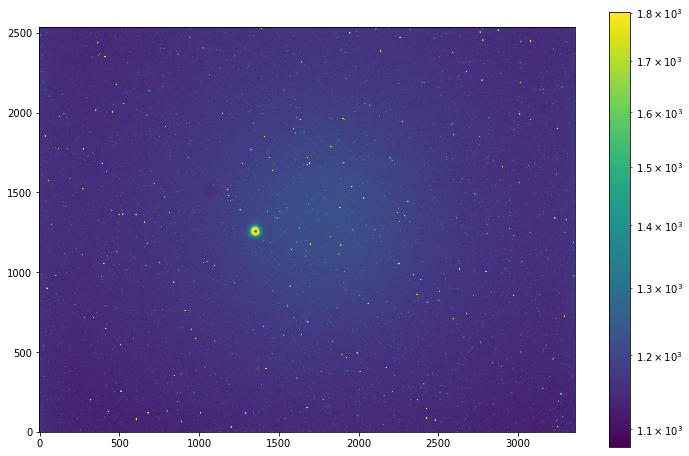

In [342]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.ndimage import gaussian_filter, maximum_filter
from astropy.io import fits

def find_centroid_of_brightest_star(image, psf_sigma=15, display_plot=False):
    """
    Finds the centroid of the brightest star in the given image using a Gaussian
    filter and a maximum filter to identify the peak location.
    """
    # Smooth the image to reduce noise and enhance the star feature
    filtered_image = gaussian_filter(image, sigma=psf_sigma)
    max_filter_size = int(2.35 * psf_sigma)  # Approximate FWHM

    # Apply a maximum filter to locate local maxima
    maximum_filtered_image = maximum_filter(filtered_image, size=max_filter_size)
    is_global_peak = ((filtered_image == maximum_filtered_image) &
                      (filtered_image != 0.0) &
                      (maximum_filtered_image == np.max(maximum_filtered_image)))

    # Extract the coordinates of peak locations
    peak_locations = np.nonzero(is_global_peak)
    star_positions = np.array(peak_locations).T
    centroid_position = np.median(star_positions, axis=0)

    # Display plot if requested
    if display_plot:
        norm = mpl.colors.LogNorm(vmin=np.nanpercentile(image, 1), vmax=np.nanpercentile(image, 99.9))
        fig, ax = plt.subplots(figsize=(12, 8))
        color_bar = ax.imshow(image, origin='lower', norm=norm)
        plt.colorbar(color_bar)
        ax.add_patch(mpl.patches.Circle((centroid_position[1], centroid_position[0]), radius=5.0, edgecolor='r', fill=True))
    
    return centroid_position

# Load an example image and find the centroid, RAW DATA IS THE BEST HERE BC OF SCALE!
proc_targ_im_fn = 'v_001.FIT' 
file = raw_data_dir + '/' + proc_targ_im_fn
im = fits.getdata(file)
centroid = find_centroid_of_brightest_star(im, display_plot=True)
print('Centroid:', centroid)


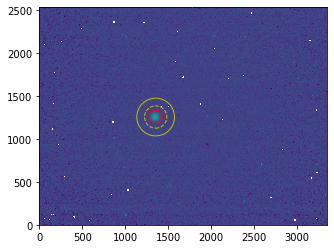

In [343]:
# first some definitions, NEED TO USE THE CALIBRATED VALUES HERE!
proc_targ_im_fn = 'Calibrated_v_001.FIT' # filename for processed example target exposure
t_exp = 60  # [s] exposure time
x, y = 1355, 1256.5  # [pix], [pix]  stellar x and y postiions
phot_rad = 80  # [pix] photometric aperture radius
sky_ann_inner_rad = 130  # [pix] sky annulus inner radius
sky_ann_outer_rad = 220  # [pix] sky annulus outer radius

# load the target image
im = fits.getdata(final_V + '/' + proc_targ_im_fn)

# create a figure
fig = pylab.figure()
ax = fig.add_subplot(111)
norm = mpl.colors.LogNorm(vmin=1, vmax= im.max())

# display the image
ax.imshow(im, norm=norm)

# overlay a circle for the photometric aperture
ax.add_patch(mpl.patches.Circle((x,y), # center of the circle
                                radius=phot_rad, # radius of the circle
                                ec='r', # sets the circle edge color to blue
                                fill=False, # does not fill the circle with color
                               ))

# overlay a circle for the sky annulus inner radius
ax.add_patch(mpl.patches.Circle((x,y),
                               radius = sky_ann_inner_rad,
                               ec ='y',
                               fill = False,
                               linestyle = '--'))


# overlay a circle for the sky annulus outer radius
ax.add_patch(mpl.patches.Circle((x,y),
                               radius = sky_ann_outer_rad,
                               ec ='y',
                               fill = False,
                               ))

# show the figure
pylab.draw()


We should be sure the apertures are centered on the star.

The ideal size for the photometric aperture is roughly to have it as large as possible without being so big as being dominated by sky background noise.  So we should have it sized so that it encompasses the majority of the visible starlight.

Note that since we are using the same aperture sizes for all exposures, it won't be optimal in all cases.  We're aiming for "good enough" here.

The sky annulus inner radius should be large enough so that no signal from the star is in the sky annulus.  The outer radius should be large enough so that a good number of pixels are included (ideally more area in the sky annulus than the target aperture), but not so large that systematic errors from sky nonuniformity creep in.  There is no grea recipe for the sky annulus; just get something good enough.

Once we have our aperture set, let's do the photometry.

In [263]:
from a180 import ap_phot

gain = .38  # [e-/DN] gain of image sensor

phot, phot_err = ap_phot(im, x, y, 
                         phot_rad, 
                         sky_in=sky_ann_inner_rad, 
                         sky_out=sky_ann_outer_rad, 
                         gain=gain)  # get the aperture photometry
phot /= t_exp  # [DN] -> [DN/s]
phot_err /= t_exp  # [DN] -> [DN/s]

print(phot, phot_err)

16009.424404449306 176.76890821487808


#### Positions for all star exposures

We need to get the star position for all of our exposures.  The simplest way is through visual inspection.

In [367]:
import os
# Get the files from the V-band Directory
directoryV = '/data/home/a180m/Proc_Data_Lab2/Calibrated_V_data'
Vfiles = [f for f in os.listdir(directoryV) if os.path.isfile(os.path.join(directoryV, f))]
Vfiles = sorted(Vfiles) # sort files in order 001-026


# define xy positions for target V-band exposures

targV_xys = []

for fn in raw_targV_files: 
    file = raw_data_dir + '/' + fn
    im = fits.getdata(file)
    centroid = find_centroid_of_brightest_star(im, display_plot=False)
    x = centroid[1]
    y = centroid[0]
    targV_xys.append([x,y])
    
targV_xy = np.array(targV_xys)


# define xy positions for target R-band exposures
directoryR = '/data/home/a180m/Proc_Data_Lab2/Calibrated_R_data'
Rfiles = [f for f in os.listdir(directoryR) if os.path.isfile(os.path.join(directoryR, f))]
Rfiles = sorted(Rfiles)

targR_xys = []

for fn in raw_targR_files: 
    file = raw_data_dir + '/' + fn
    im = fits.getdata(file)
    centroid = find_centroid_of_brightest_star(im, display_plot=False)
    x = centroid[1]
    y = centroid[0]
    targR_xys.append([x,y])
    

targR_xy = np.array(targR_xys)


# define xy positions for standard R-band exposures
directoryRS = '/data/home/a180m/Proc_Data_Lab2/Calibrated_rS_data'
RSfiles = [f for f in os.listdir(directoryRS) if os.path.isfile(os.path.join(directoryRS, f))]
RSfiles = sorted(RSfiles)
targRS_xys = []

for fn in raw_photR_files: 
    file = raw_data_dir + '/' + fn
    im = fits.getdata(file)
    centroid = find_centroid_of_brightest_star(im, display_plot=False)
    x = centroid[1]
    y = centroid[0]
    targRS_xys.append([x,y])
    

targRS_xy = np.array(targRS_xys)


# define xy positions for standard V-band exposures
directoryVS = '/data/home/a180m/Proc_Data_Lab2/Calibrated_vS_data'
VSfiles = [f for f in os.listdir(directoryVS) if os.path.isfile(os.path.join(directoryVS, f))]
VSfiles = sorted(VSfiles)

targVS_xys = []

for fn in raw_photV_files: 
    file = raw_data_dir + '/' + fn
    im = fits.getdata(file)
    centroid = find_centroid_of_brightest_star(im, display_plot=False)
    x = centroid[1]
    y = centroid[0]
    targVS_xys.append([x,y])
    

targVS_xy = np.array(targVS_xys)


#Print out each 2D array of coords
print(targVS_xy)
print(targV_xy)
print(targR_xy)
print(targRS_xy)





[[1393.  1638. ]
 [1400.  1632. ]
 [1405.  1629. ]
 [1406.5 1643. ]
 [1413.  1641. ]]
[[1355.  1256.5]
 [1367.  1265. ]
 [1373.5 1271.5]
 [1377.5 1292. ]
 [1389.5 1302.5]
 [1399.5 1304. ]
 [1412.  1312.5]
 [1422.  1317. ]
 [1432.  1311. ]
 [1442.  1319. ]
 [1457.  1326. ]
 [1472.  1327.5]
 [1487.  1337. ]
 [1496.5 1334.5]
 [1528.5 1324. ]
 [1568.  1303. ]
 [1602.  1285.5]
 [1618.  1287. ]
 [1633.5 1276. ]
 [1649.  1265. ]
 [1670.  1258. ]
 [1690.  1235. ]
 [1706.5 1227. ]
 [1722.5 1220.5]
 [1741.5 1210.5]
 [1754.  1213. ]]
[[1353.  1271.5]
 [1361.  1274.5]
 [1368.  1291. ]
 [1380.  1296. ]
 [1395.  1287. ]
 [1405.5 1292. ]
 [1417.5 1305.5]
 [1421.  1317. ]
 [1429.  1321. ]
 [1441.  1336. ]
 [1456.  1336.5]
 [1472.5 1337. ]
 [1482.  1335. ]
 [1508.  1322. ]
 [1546.5 1301.5]
 [1588.  1278.5]
 [1612.  1265.5]
 [1629.  1267. ]
 [1639.  1266.5]
 [1657.  1264. ]
 [1673.  1256. ]
 [1688.  1246. ]
 [1708.  1233. ]
 [1725.5 1223. ]
 [1745.  1202. ]
 [1767.  1197. ]]
[[1420. 1622.]
 [1421. 1631.

#### Photometry for all exposures

Let's loop and get photometric measurements for all exposures.  Try writing a function to loop over an exposure sequence, and return numpy arrays of the photometry and photometric error, each in DN/s.

In [376]:

def phot(files, xys, directory):
    phot_rad,sky_in,sky_out,gain = 80,130,220,.38
    t = 60 #in seconds [s]
    F = []
    F_err = []
    a = 0
    b = 0
    for fn in files: 
        file = directory + '/' + fn
        #print(file)
        im = fits.getdata(file)
        x = xys[a][0]  #This is one giant array, extracitng 00 each time is the same value, need to update! 
        y = xys[b][1]
        a += 1
        b += 1
        flux, flux_err = ap_phot(im, x, y, phot_rad, sky_in, sky_out, gain)
        flux /= t  # [DN] -> [DN/s]
        flux_err /= t  # [DN] -> [DN/s]
        
        F.append(flux)
        F_err.append(flux_err)

    return F, F_err

F_V_targ, F_V_targ_err = phot(Vfiles, targV_xy, directoryV)
F_R_targ, F_R_targ_err = phot(Rfiles, targR_xy, directoryR)
F_R_std, F_R_std_err = phot(RSfiles, targRS_xy, directoryRS)
F_V_std, F_V_std_err = phot(VSfiles, targVS_xy, directoryVS)




/home/a180i/lib/python/a180.py:80: RuntimeWarning: divide by zero encountered in true_divide
  return 0.5 * r**2 * (np.arctan(y1/x) - np.arctan(y0/x))


#### Plotting the raw photometry vs. time

Let's do a quick check and examine our photometry (and errors) vs. time in each band.

[206, 412, 618, 824, 1030, 1236, 1442, 1648, 1854, 2060, 2266, 2472, 2678, 2884, 3090, 3296, 3502, 3708, 3914, 4120, 4326, 4532, 4738, 4944, 5150, 5356]


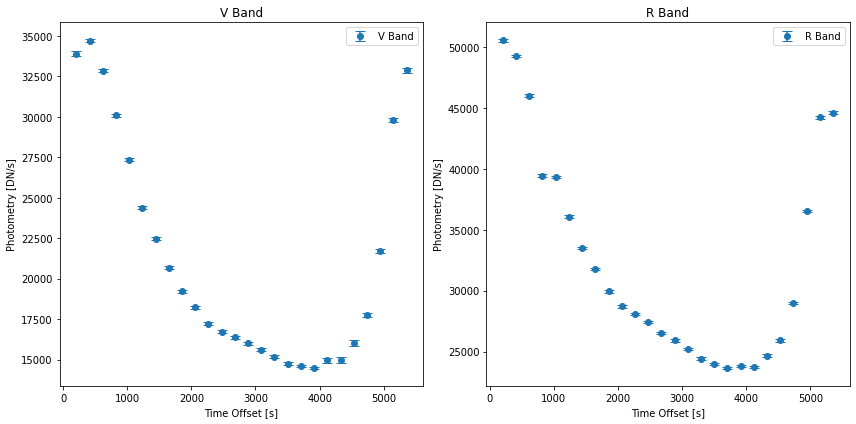

In [377]:
import matplotlib.pyplot as plt 

# target time offsets in V band, 90 seconds between exposures 
t_offs_V = []
for i in range(27):
    if (i == 0):
        continue
    T = i*((60+43)*2)
    t_offs_V.append(T)

print(t_offs_V)
# target time offsets in R band
t_offs_R = []
for i in range(27):
    if (i == 0):
        continue
    T = i*((60+43)*2)
    t_offs_R.append(T)


# Set up figure using pylab
fig = plt.figure(figsize=(12, 6))  # Specify figure size
ax1 = fig.add_subplot(121)  # One row, two columns, first subplot
ax2 = fig.add_subplot(122)  # One row, two columns, second subplot

# Plot V band
ax1.errorbar(t_offs_V, F_V_targ, yerr=F_V_targ_err, fmt='o', capsize=5, label='V Band')
ax1.set_title('V Band')
ax1.set_xlabel('Time Offset [s]')
ax1.set_ylabel('Photometry [DN/s]')
ax1.legend()  # Add legend to V band plot

# Plot R band
ax2.errorbar(t_offs_R, F_R_targ, yerr=F_R_targ_err, fmt='o', capsize=5, label='R Band')
ax2.set_title('R Band')
ax2.set_xlabel('Time Offset [s]')
ax2.set_ylabel('Photometry [DN/s]')
ax2.legend()  # Add legend to R band plot

# Finalize and show plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the figure


#### Calibrating the photometry

We'll use the standard star photometry and its known magnitudes in each filter to calibrate our starget star photometry and put it into magnitude units.

Let's first get an average DN/s level for our standard star in each band, along with an uncertainty.  

In [378]:
F0_V = np.mean(F_V_std)  # [DN/s]
F0_V_err = np.mean(F_V_std_err)  # [DN/s]
F0_R = np.mean(F_R_std)  # [DN/s]
F0_R_err = np.mean(F_R_std_err)  # [DN/s]

Now we'll use this observed flux level and the known magnitude to get a zero point (and associated uncertainty).

In [379]:
m0_V = 9.70  # [mag]
m0_V_err = .0013  # [mag]
m0_R = 9.35  # [mag]
m0_R_err = .0012  # [mag]

Finally we can use these to calibrate our target star photometry.

In [381]:
def flux_mag(F, m, F0):
    for i in F:
        M = m - 2.5 * np.log10(F / F0)
    return M

# calibrated target star V-band photometry [mag] 
M_V = flux_mag(F_V_targ, m0_V,F0_V)


#Take the uncertianity as well 

M_Verr = flux_mag(F_V_targ_err, m0_V_err, F0_V_err)


# calibrated target star R-band photometry [mag] 
M_R = flux_mag(F_R_targ, m0_R,F0_R)


#Take the uncertianity as well 

M_Rerr = flux_mag(F_R_targ_err, m0_R_err, F0_R_err)
print(M_Rerr)

[-0.17647863  0.02814389  0.0590865   0.04696378  0.09524551  0.08302917
  0.13412288  0.12766335  0.14239339  0.15780388  0.16626022  0.18294081
  0.12127243 -0.08149533  0.12603035  0.06482643  0.17443917  0.21090462
  0.24927777  0.03185441 -0.2804086   0.06931246  0.04178566  0.03670403
  0.00658965  0.04534193]


#### Plotting the calibrated photometry

We'll want to plot our photometry (and errors) vs. time.

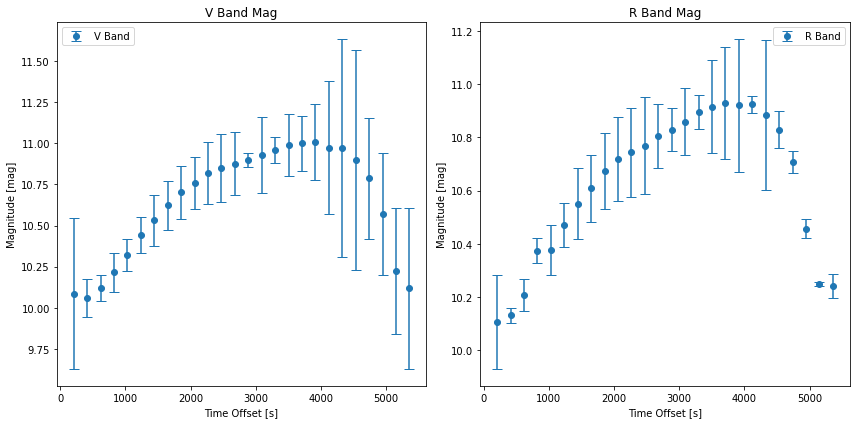

In [392]:
# Set up figure using pylab
fig = plt.figure(figsize=(12, 6))  # Specify figure size
ax1 = fig.add_subplot(121)  # One row, two columns, first subplot
ax2 = fig.add_subplot(122)  # One row, two columns, second subplot

# Plot V band
ax1.errorbar(t_offs_V, M_V, yerr=M_Verr, fmt='o', capsize=5, label='V Band')
ax1.set_title('V Band Mag')
ax1.set_xlabel('Time Offset [s]')
ax1.set_ylabel('Magnitude [mag]')
ax1.legend()  # Add legend to V band plot

# Plot R band
ax2.errorbar(t_offs_R, M_R, yerr=M_Rerr, fmt='o', capsize=5, label='R Band')
ax2.set_title('R Band Mag')
ax2.set_xlabel('Time Offset [s]')
ax2.set_ylabel('Magnitude [mag]')
ax2.legend()  # Add legend to R band plot

# Finalize and show plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the figure



In [398]:
print(M_V)

sum_MV = np.sum(M_V)
print(sum_MV)
m_avg = sum_MV/26
print(m_avg)

[10.08537088 10.05968762 10.11930729 10.21473441 10.31828065 10.44310838
 10.53206133 10.62203567 10.70126543 10.75824237 10.82008525 10.85152263
 10.87480992 10.89967471 10.92675379 10.95797078 10.98862702 10.99913127
 11.00874321 10.97410604 10.97241876 10.89964528 10.78752299 10.56950435
 10.22563888 10.11836138]
276.72861029726016
10.64340808835616


#### Computing a color

We'll want to look at $V-R$ color vs. time as well.  One complication is that we don't have the same timestamps for our $V$ and $R$ exposures, so we can't just subtract them.

We can get a sense of the color change by interpolating the time sequences.


In [389]:
# interpolate the time series data
from scipy.interpolate import interp1d
interp_mR_func = interp1d(t_offs_R, M_R, kind='linear', fill_value="extrapolate")
int_mR = interp_mR_func(t_offs_V) # interpolated magnitudes at V-band time locations

# compute the V-R color (magnitudes)
V_R = M_V - int_mR
print(V_R)

# estimate the uncertainties for the color
V_Rerr = M_Verr - M_Rerr


[-0.01918384 -0.07236196 -0.08729005 -0.15896786 -0.05812614 -0.0274659
 -0.01893303  0.01418693  0.0281174   0.0394455   0.07644345  0.08317684
  0.06930314  0.07065585  0.06746187  0.06308664  0.07395882  0.06923576
  0.08794824  0.04928423  0.08848118  0.07024274  0.07972859  0.11239213
 -0.02358017 -0.12174479]


#### Plotting the color
Let's see the results.

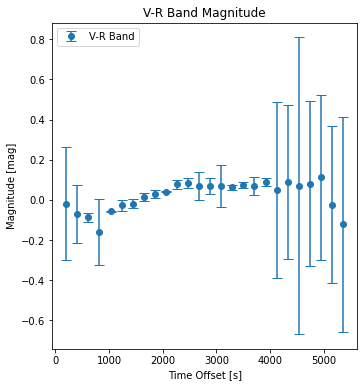

In [394]:
# Set up figure using pylab
fig = plt.figure(figsize=(12, 6))  # Specify figure size
ax1 = fig.add_subplot(121)  


# Plot V band
ax1.errorbar(t_offs_V, V_R, yerr=V_Rerr, fmt='o', capsize=5, label='V-R Band')
ax1.set_title('V-R Band Magnitude')
ax1.set_xlabel('Time Offset [s]')
ax1.set_ylabel('Magnitude [mag]')
ax1.legend()  # Add legend to V band plot

plt.show()